# MATH 578 - Homework 2

In [45]:
# Required imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import sympy as sp
sp.init_printing()
%matplotlib inline

from plotutils import *

In [57]:
def newton_iter(x, f, fp):
    """
    A single Newton method iteration.
    """
    return x - f(x)/fp(x)

def solve(x0, f, fp, tol=1e-8, iter_max = 100):
    """
    Find root using Newton's method.
    
    Parameters
    ----------
    x0 : float
        Initial guess for the root.
    f, fp : func
        Function and its derivative.
    tol : float, optional
        Tolerance.
    iter_max : int, optional
        Maximum number of iterations
        
    Returns
    -------
    all_x : list
        Progression of x. x[-1] should be the value of the root 
        with a given tolerance -- hopefully.
    all_err : list
        Progression of the absolute error. Should go to 0.
    """
    err = 1
    all_x = []
    all_err = []
    x = x0
    all_x.append(x0)
    all_err.append(f(x0))
    for i in range(iter_max):
        x1 = newton_iter(x, f, fp)
        err = abs(f(x1))
        all_err.append(err)
        all_x.append(x1)
        x = x1
        if err < tol:
            break
    else:
        print('Maximum number of iterations reached.')
    return all_x, all_err

## Question 1.

\begin{align}
f(x) &= \cos(x) - x\\
f\prime(x) &= -\sin(x) - 1
\end{align}

In [58]:
f = lambda x: np.cos(x) - x
fp = lambda x: -np.sin(x) - 1
x0 = -1

Let's visualize that function.

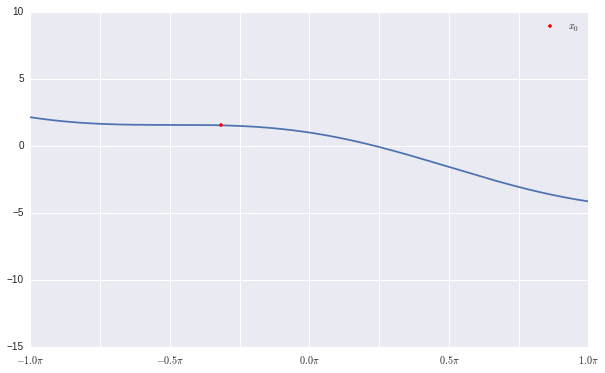

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(-10, 10, 1000)
plot_init(ax, x, f, x0)
pi_plot(ax, -1, 1)
plt.show()

This is obviously not an optimal starting point -- we're close to being on a saddle point. Were we directly on the saddle point, the root-finding algorithm would have to divide by 0 and we would not be able to proceed without picking another starting point.

### $x_0$ = -1

In [60]:
x0 = -1
all_x, all_err = solve(x0, f, fp)
pd.DataFrame(np.array([all_x, all_err]).T, columns=['$x_i$', '$|f(x_i)|$'])

,$x_i$,$|f(x_i)|$
0,-1.000000,1.540302e+00
1,8.716217,9.475516e+00
2,2.976061,3.962391e+00
3,-0.425785,1.336500e+00
4,1.851184,2.127912e+00
5,0.766040,4.537746e-02
6,0.739241,2.609825e-04
7,0.739085,8.984142e-09


### Picture

Only with first 4 iterations.

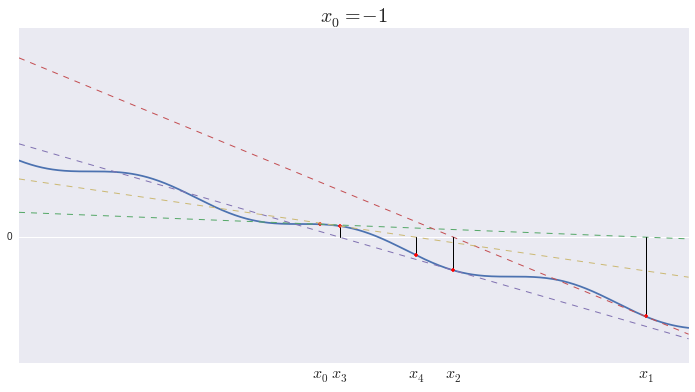

In [61]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_init(ax, x, f, x0, legend=False)
showoff(ax, all_x[:5], f, fp)
ax.set_title('$x_0 = -1$', fontsize=20)
plt.show()

### $x_0$ = $\pi/4$

In [62]:
x0 = np.pi/4
all_x, all_err = solve(x0, f, fp)
pd.DataFrame(np.array([all_x, all_err]).T, columns=['$x_i$', '$|f(x_i)|$'])

,$x_i$,$|f(x_i)|$
0,0.785398,-7.829138e-02
1,0.739536,7.548747e-04
2,0.739085,7.512987e-08
3,0.739085,7.771561e-16


We get to machine precision after 4 iterations with this new initial guess. 

We won't be plotting the derivatives for this one for obvious reasons.

## Question 2.

### a)
\begin{align}
f_1(x, y) &= 3x^2 - y^2 &= 0\\
f_2(x, y) &= 3xy^2 - x^3 - 1 &= 0
\end{align}


$$
J = \left(\begin{array}{ccc}
6x & -2y \\
-3x^2 + 3y^2 & 6xy \end{array}\right)
$$

In [65]:
def f(x, y):
    f1 = 3*x**2 - y**2
    f2 = 3*x*y**2 - x**3 - 1
    return np.array([f1, f2])

In [66]:
def J(x, y):
    return np.array([
        [6*x              , -2*y ],
        [-3*x**2 + 3*y**2 , 6*x*y],
    ])

In [50]:
def newton_iter_2d(x, f, A):
    

IndentationError: expected an indented block (<ipython-input-50-9aa94114bec0>, line 2)